### Date Time Index

In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_mnth = 2
my_day = 12
my_hour = 14
my_min = 34
my_sec = 45

In [3]:
my_date = datetime(my_year, my_mnth, my_day, my_hour, my_min, my_sec)

In [4]:
my_date

datetime.datetime(2020, 2, 12, 14, 34, 45)

In [5]:
my_date.day

12

In [6]:
my_date.hour

14

In [7]:
import numpy as np

In [9]:
np.array(['2020-08-15', '2020-07-11','2019-10-21','2010-11-22'], dtype='datetime64')

array(['2020-08-15', '2020-07-11', '2019-10-21', '2010-11-22'],
      dtype='datetime64[D]')

In [10]:
np.arange('2020-06-01', '2020-07-01', 7, dtype='datetime64[D]')

array(['2020-06-01', '2020-06-08', '2020-06-15', '2020-06-22',
       '2020-06-29'], dtype='datetime64[D]')

In [11]:
np.arange('2010', '2020', dtype='datetime64[Y]')

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'], dtype='datetime64[Y]')

In [12]:
import pandas as pd

In [13]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])    # MM/DD/YYYY

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [17]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-0.55634859 -1.63689055]
 [ 0.08860243  1.41587302]
 [-0.83522888 -0.32556913]]


In [18]:
idx =  pd.date_range('2020-01-01', periods=3, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-01-01,-0.556349,-1.636891
2020-01-02,0.088602,1.415873
2020-01-03,-0.835229,-0.325569


In [24]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [25]:
df.index.argmax()

2

In [26]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [27]:
df.index.argmin()

0

### Time Sampling

In [25]:
starbks = pd.read_csv("starbucks.csv", index_col='Date', parse_dates=True) 

In [24]:
starbks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [36]:
starbks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [38]:
starbks.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [27]:
# Resampling Data Based on Time

starbks.resample(rule='A').mean()    # Converting Daily data to Yearly Data 

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [41]:
# Creating A custom Function
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [43]:
# Using the custom function for resampling

starbks.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [44]:
starbks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

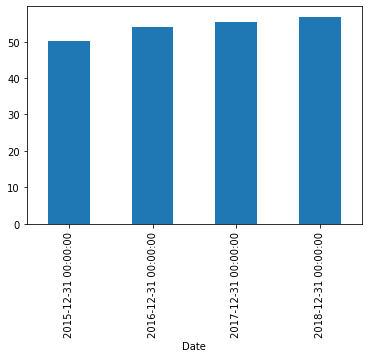

In [46]:
# Ploting the Resample

starbks['Close'].resample(rule='A').mean().plot.bar()

<AxesSubplot:xlabel='Date'>

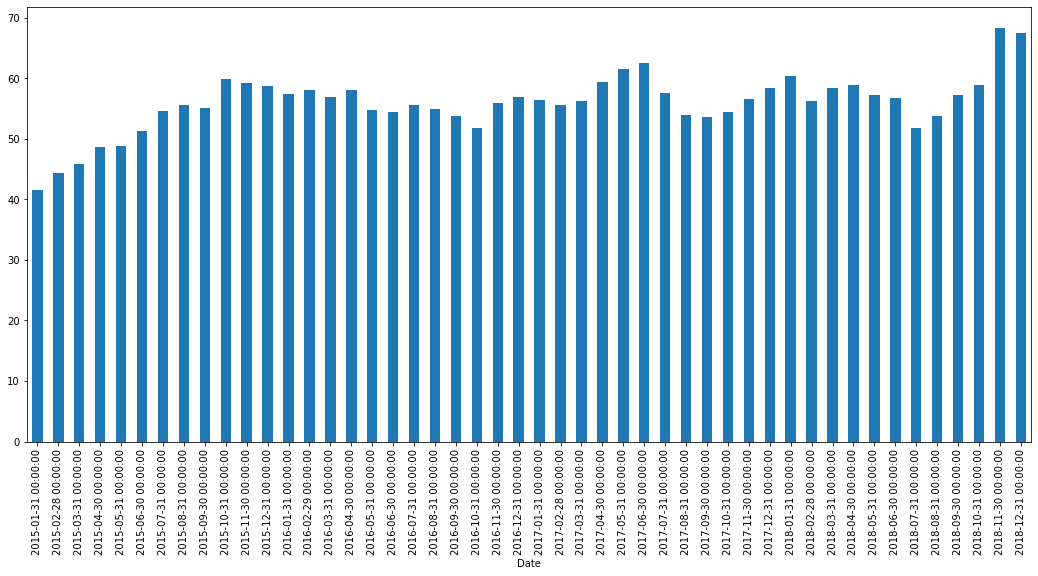

In [50]:
starbks['Close'].resample(rule='M').max().plot.bar(figsize=(18,8))

### Time Shifting

In [51]:
starbks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [52]:
starbks.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [53]:
# Shifting the Data by 1 row

starbks.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [54]:
# Shiting backwards

starbks.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [55]:
# Giving the Freq paramenter

starbks.shift(periods=1, freq='M')   # Shifting the Data by a month

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


### Rolling And Expanding

In [56]:
starbks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

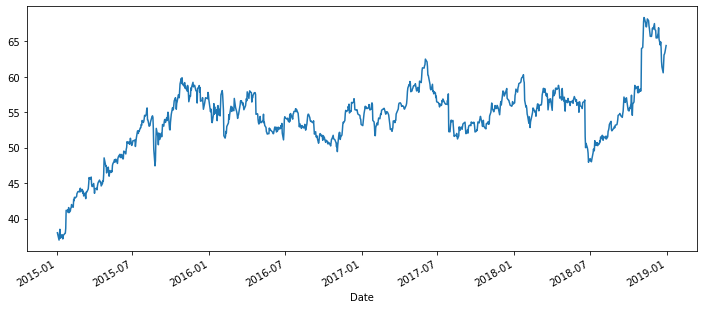

In [57]:
# Plotting the closing price

starbks['Close'].plot(figsize=(12,5))

In [59]:
# Rolling a 7 Day average

starbks.rolling(window=7).mean().head(10)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<AxesSubplot:xlabel='Date'>

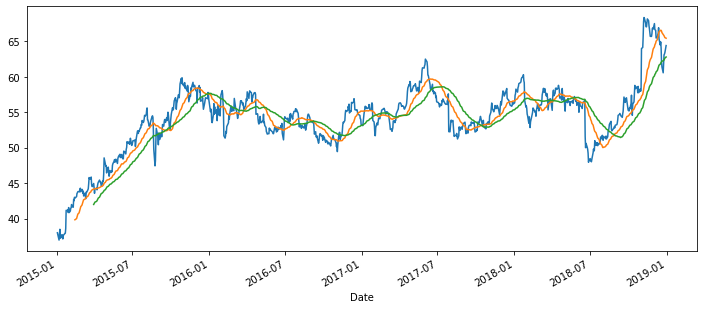

In [63]:
starbks['Close'].plot(figsize=(12,5))
starbks.rolling(window=30).mean()['Close'].plot(figsize=(12,5))   # 30 days rolling mean
starbks.rolling(window=60).mean()['Close'].plot(figsize=(12,5))   # 60 days rolling mean

In [28]:
starbks['Close: 30 day MA'] = starbks['Close'].rolling(window=30).mean()
starbks['Close: 60 day MA'] = starbks['Close'].rolling(window=60).mean()
starbks.tail()

,Close,Volume,Close: 30 day MA,Close: 60 day MA
Date,,,,
2018-12-24,60.56,6323252,65.963703,62.258177
2018-12-26,63.08,16646238,65.791913,62.367235
2018-12-27,63.20,11308081,65.647000,62.499182
2018-12-28,63.39,7712127,65.525000,62.634130
2018-12-31,64.40,7690183,65.437000,62.787900


<AxesSubplot:xlabel='Date'>

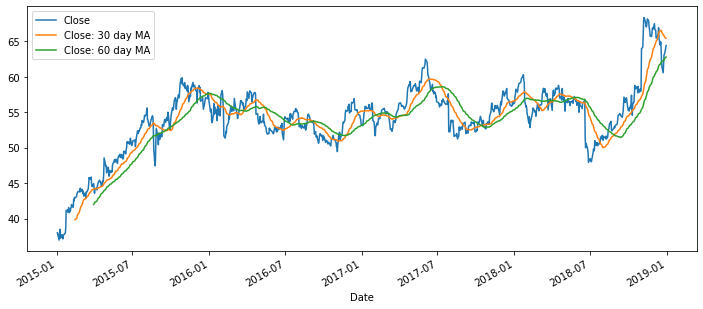

In [66]:
starbks[['Close','Close: 30 day MA','Close: 60 day MA']].plot(figsize=(12,5)) 

In [67]:
# Expanding

<AxesSubplot:xlabel='Date'>

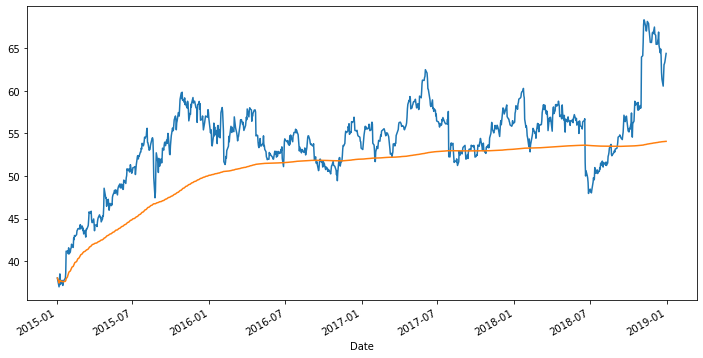

In [29]:
starbks['Close'].plot(figsize=(12,5))
starbks['Close'].expanding().mean().plot(figsize=(12,6))

# Expanding will take average of every period before the particular value

### Visualizing the Time Series Data

In [69]:
 starbks.head()

,Close,Volume,Close: 30 day MA,Close: 60 day MA
Date,,,,
2015-01-02,38.0061,6906098,NaN,NaN
2015-01-05,37.2781,11623796,NaN,NaN
2015-01-06,36.9748,7664340,NaN,NaN
2015-01-07,37.8848,9732554,NaN,NaN
2015-01-08,38.4961,13170548,NaN,NaN


<AxesSubplot:xlabel='Date'>

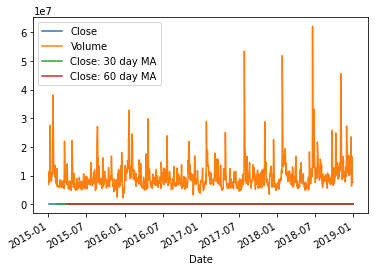

In [70]:
starbks.plot()

In [71]:
# CLose is a flat line in a above plot because of difference in the scale of close and volume

In [72]:
# Plot Formatting

In [74]:
title = 'Title'
xlabel = 'X label'
ylabel = 'Y label'


[Text(0.5, 0, 'X label'), Text(0, 0.5, 'Y label')]

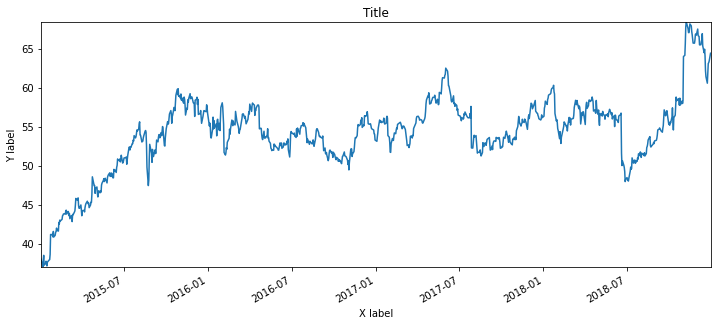

In [75]:
ax = starbks['Close'].plot(figsize=(12,5), title=title)
ax.autoscale(axis='both',tight=True)   # Remove the white space along the axis
ax.set(xlabel=xlabel, ylabel=ylabel)


<AxesSubplot:xlabel='Date'>

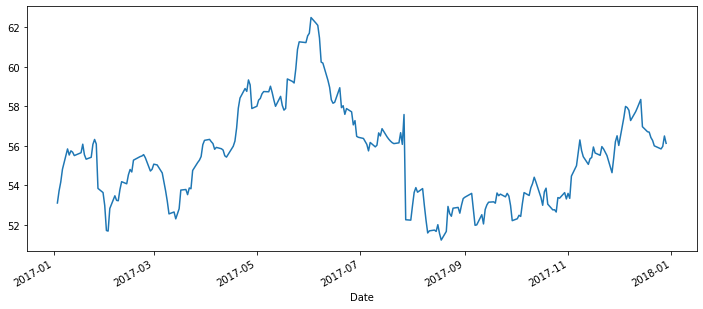

In [80]:
# Plotting the particular year
starbks['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,5))    # Changing the xlim at the Data level

<AxesSubplot:xlabel='Date'>

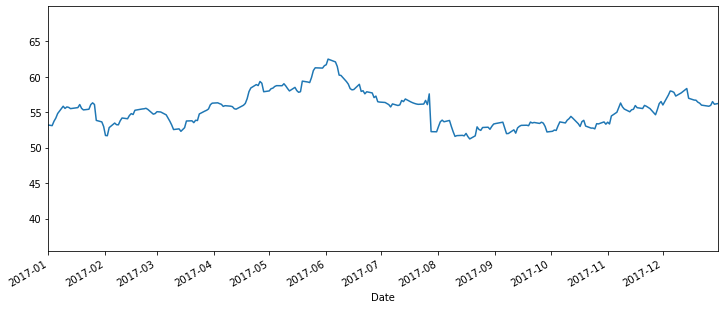

In [82]:
starbks['Close'].plot(figsize=(12,5), xlim=['2017-01-01','2017-12-31'])   # Changing the xlim at the plot level

In [83]:
# In the both the above plot information is the same but the plot is different due the scaling of the Y=axis

In [84]:
from matplotlib import dates

<AxesSubplot:xlabel='Date'>

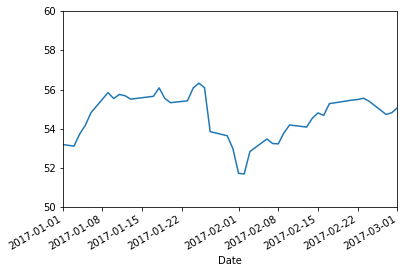

In [88]:
starbks['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60])

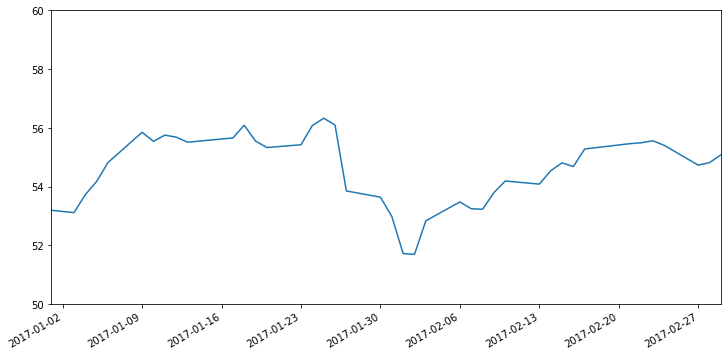

In [92]:
ax = starbks['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,6))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))   # 0 is monday

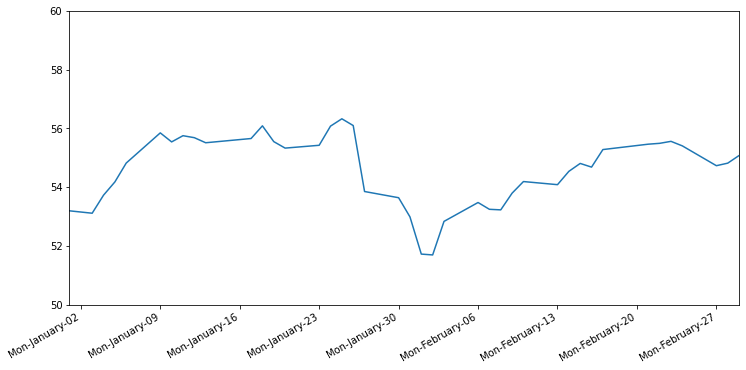

In [93]:
ax = starbks['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,6))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))   # 0 is monday
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

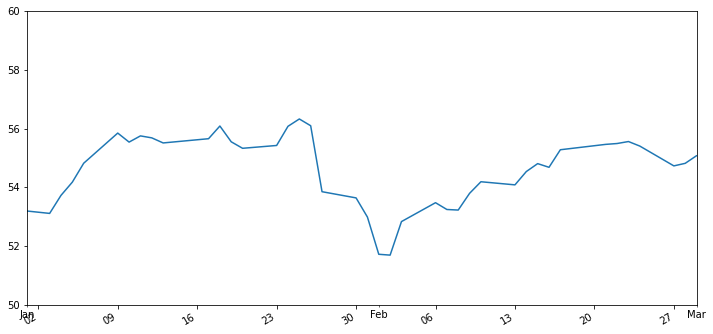

In [96]:
ax = starbks['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,6))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))   # 0 is monday
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())  
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))